10000
10000
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


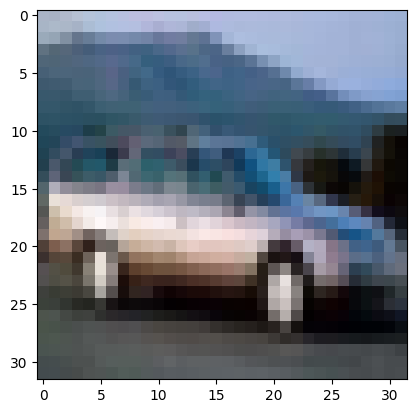

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


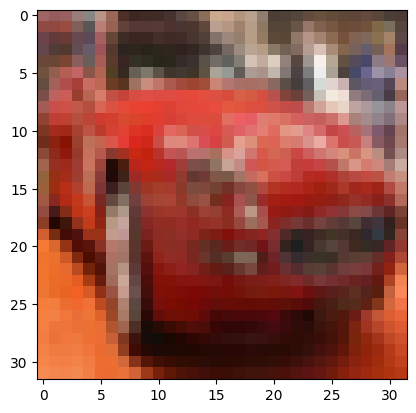

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


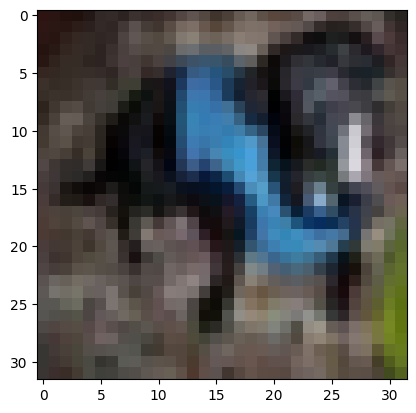

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


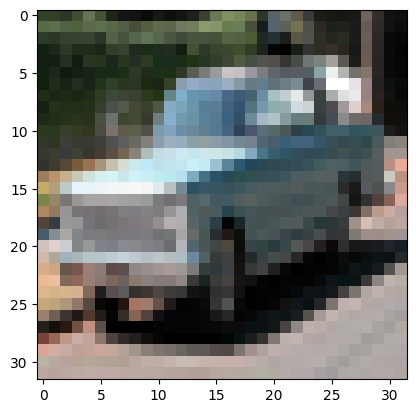

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


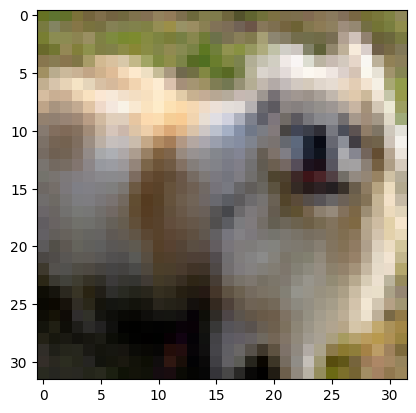

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


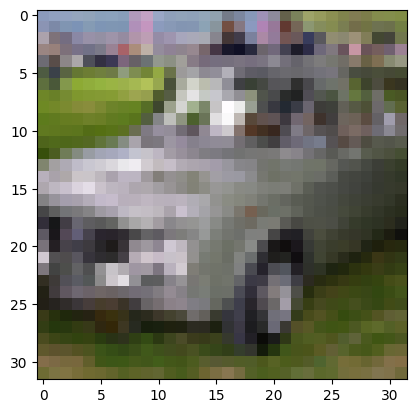

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


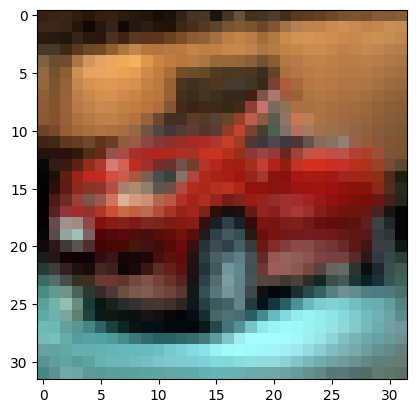

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


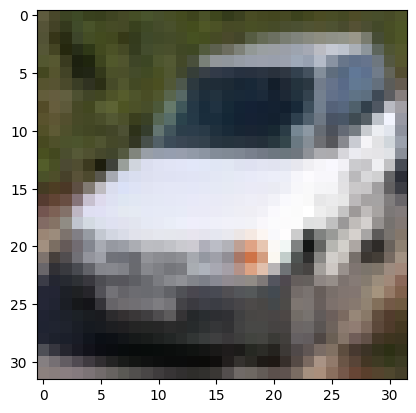

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


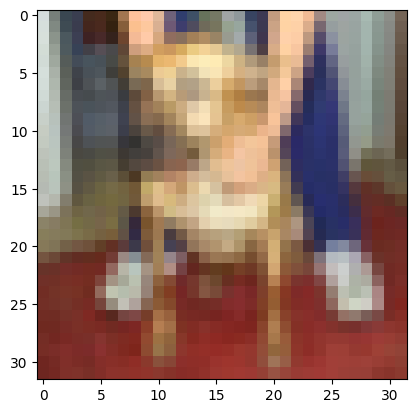

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


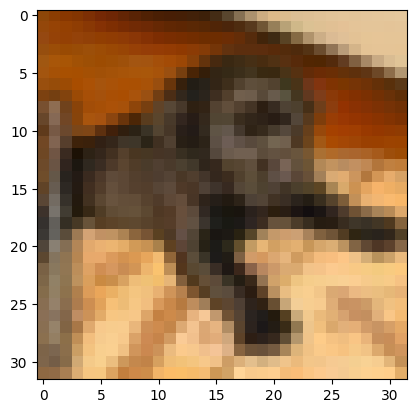

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

data = cifar10.load_data()

X=data[0][0].astype('float32') / 255.0

y=to_categorical(data[0][1])

X_filtered = [] 
y_filtered = []

for i in range(len(X)):
  if y[i][5] == 1 or y[i][1] == 1:
    X_filtered.append(X[i])
    y_filtered.append(y[i])

X_filtered = np.array(X_filtered)
y_filtered = np.array(y_filtered)

print(len(y_filtered))
print(len(X_filtered))

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=1)

for i in range(10):
  print(y_filtered[i])
  plt.imshow(X_filtered[i])
  plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
model.save('miw_sXXXXX_f_{}_model_fit.h5'.format(1))
model2.save('miw_sXXXXX_f_{}_model2_fit.h5'.format(1))

Epoch 1/20
110/110 [==============================] - 3s 8ms/step - loss: 0.5479 - accuracy: 0.7319 - val_loss: 0.3127 - val_accuracy: 0.8793
Epoch 2/20
110/110 [==============================] - 1s 6ms/step - loss: 0.3079 - accuracy: 0.8747 - val_loss: 0.2409 - val_accuracy: 0.9133
Epoch 3/20
110/110 [==============================] - 1s 6ms/step - loss: 0.2404 - accuracy: 0.9044 - val_loss: 0.2011 - val_accuracy: 0.9250
Epoch 4/20
110/110 [==============================] - 1s 6ms/step - loss: 0.2031 - accuracy: 0.9244 - val_loss: 0.1743 - val_accuracy: 0.9310
Epoch 5/20
110/110 [==============================] - 1s 6ms/step - loss: 0.1660 - accuracy: 0.9369 - val_loss: 0.1401 - val_accuracy: 0.9457
Epoch 6/20
110/110 [==============================] - 1s 6ms/step - loss: 0.1476 - accuracy: 0.9461 - val_loss: 0.1292 - val_accuracy: 0.9520
Epoch 7/20
110/110 [==============================] - 1s 6ms/step - loss: 0.1297 - accuracy: 0.9521 - val_loss: 0.2607 - val_accuracy: 0.8977
Epoch 

In [ ]:
from tensorflow import keras
model = keras.models.load_model('miw_sXXXXX_f_{}_model_fit.h5'.format(1))
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

model2 = keras.models.load_model('miw_sXXXXX_f_{}_model2_fit.h5'.format(1))
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.9603333473205566
loss: 0.12358379364013672
accuracy: 0.9583333134651184
loss: 0.10293322056531906


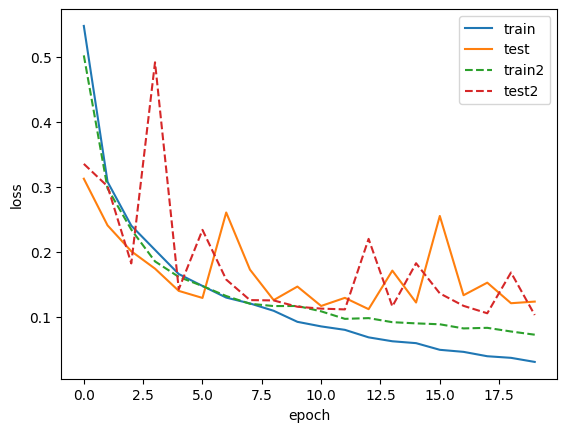

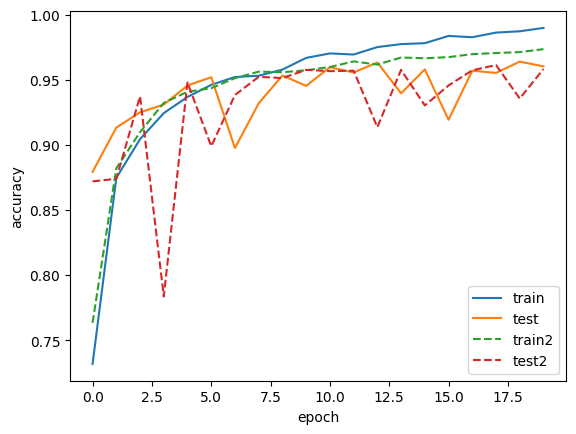

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'], '--')
plt.plot(history2.history['val_loss'], '--')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train2', 'test2'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'], '--')
plt.plot(history2.history['val_accuracy'], '--')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train2', 'test2'], loc='lower right')
plt.show()